# Plate cam with simple harmonic motion example
## Reciprocating flat-face follower

The reciprocating flat-face follower of a plate
cam is to rise 2 in with simple harmonic motion
in 180◦ of cam rotation and return with simple
harmonic motion in the remaining 180◦. The prime-circle
radius is 2 in, and the cam rotates counterclockwise.
Construct the displacement diagram and the cam
profile, offsetting the follower stem by 0.75 in in
the direction that reduces the bending of the follower
during rise.

## Libraries

It must be used the ```DiskCamMechanismLibrary``` library, which can be found on this [link](https://github.com/mauriciocaixba/leva-cam.git),  ```matplotlib``` and ```numpy``` must to be installed on the python system.

In [4]:
from DiskCamMechanismLibrary import PDCamFlatFaceFollower
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## Simple harmonic motion
The simple harmonic motion equations for rise and fall of the follower are shown below:

\begin{align*}
y&=\frac{L}{2}\left(1-\cos \theta\right)\\
y'&=\frac{L}{2}\sin \theta\\
y''&=\frac{L}{2}\cos \theta
\end{align*}

where $L$ is the maximum displacement reached by the follower and $\theta$ is the angular position of the cam.

The following python code is added to calculate the displacement, velocity and acceleration of the follower.

In [6]:
def SimpleHarmonicMotion(th,L):
    y = 0.5*L*(1-np.cos(th))
    yp = 0.5*L*np.sin(th)
    ypp = 0.5*L*np.cos(th)
    return y,yp,ypp

## Problem data:
\begin{align*}
L&=2 \text{ in}\\
r_{\text{prime}}&=1.5\text{ in}\\
\epsilon&=0.75 \text{ in}
\end{align*}

In [8]:
# %% problem data
L=2
Rbase=1.5 #prime radius circle
Rbroca=3/16 # drill bit radius (cam center)
eccentricity = 0.75
# Angular position of the follower in radians
FollowerAng = np.pi/2
# angular sweep from zero to 2 pi radians
theta = np.linspace(0,1,500)*2*np.pi
# calculate displacement, velocity, acceleration
y,yp,ypp = SimpleHarmonicMotion(theta,L)

# Group data in dictionary, for other parameters consult the documentation of DiskCamMechanismLibrary
CamData={'theta':theta,
         'y':y,
         'yp':yp,
         'ypp':ypp,
         'Rbase':Rbase,
         'Rhole':Rbroca,
         'epsilon':eccentricity,
         'FollowerAng':FollowerAng,
         'Followerwidth': 4/16,
         'turn_direction':'anti-clockwise',
        }

## Calculating the Cam Profile

In [10]:
Cam=PDCamFlatFaceFollower(**CamData)

## Motion diagram

array([<Axes: title={'center': 'Displacement Diagram'}>,
       <Axes: title={'center': 'Velocity Diagram'}>,
       <Axes: title={'center': 'Acceleration Diagram'}, xlabel='Angle [radians]'>],
      dtype=object)

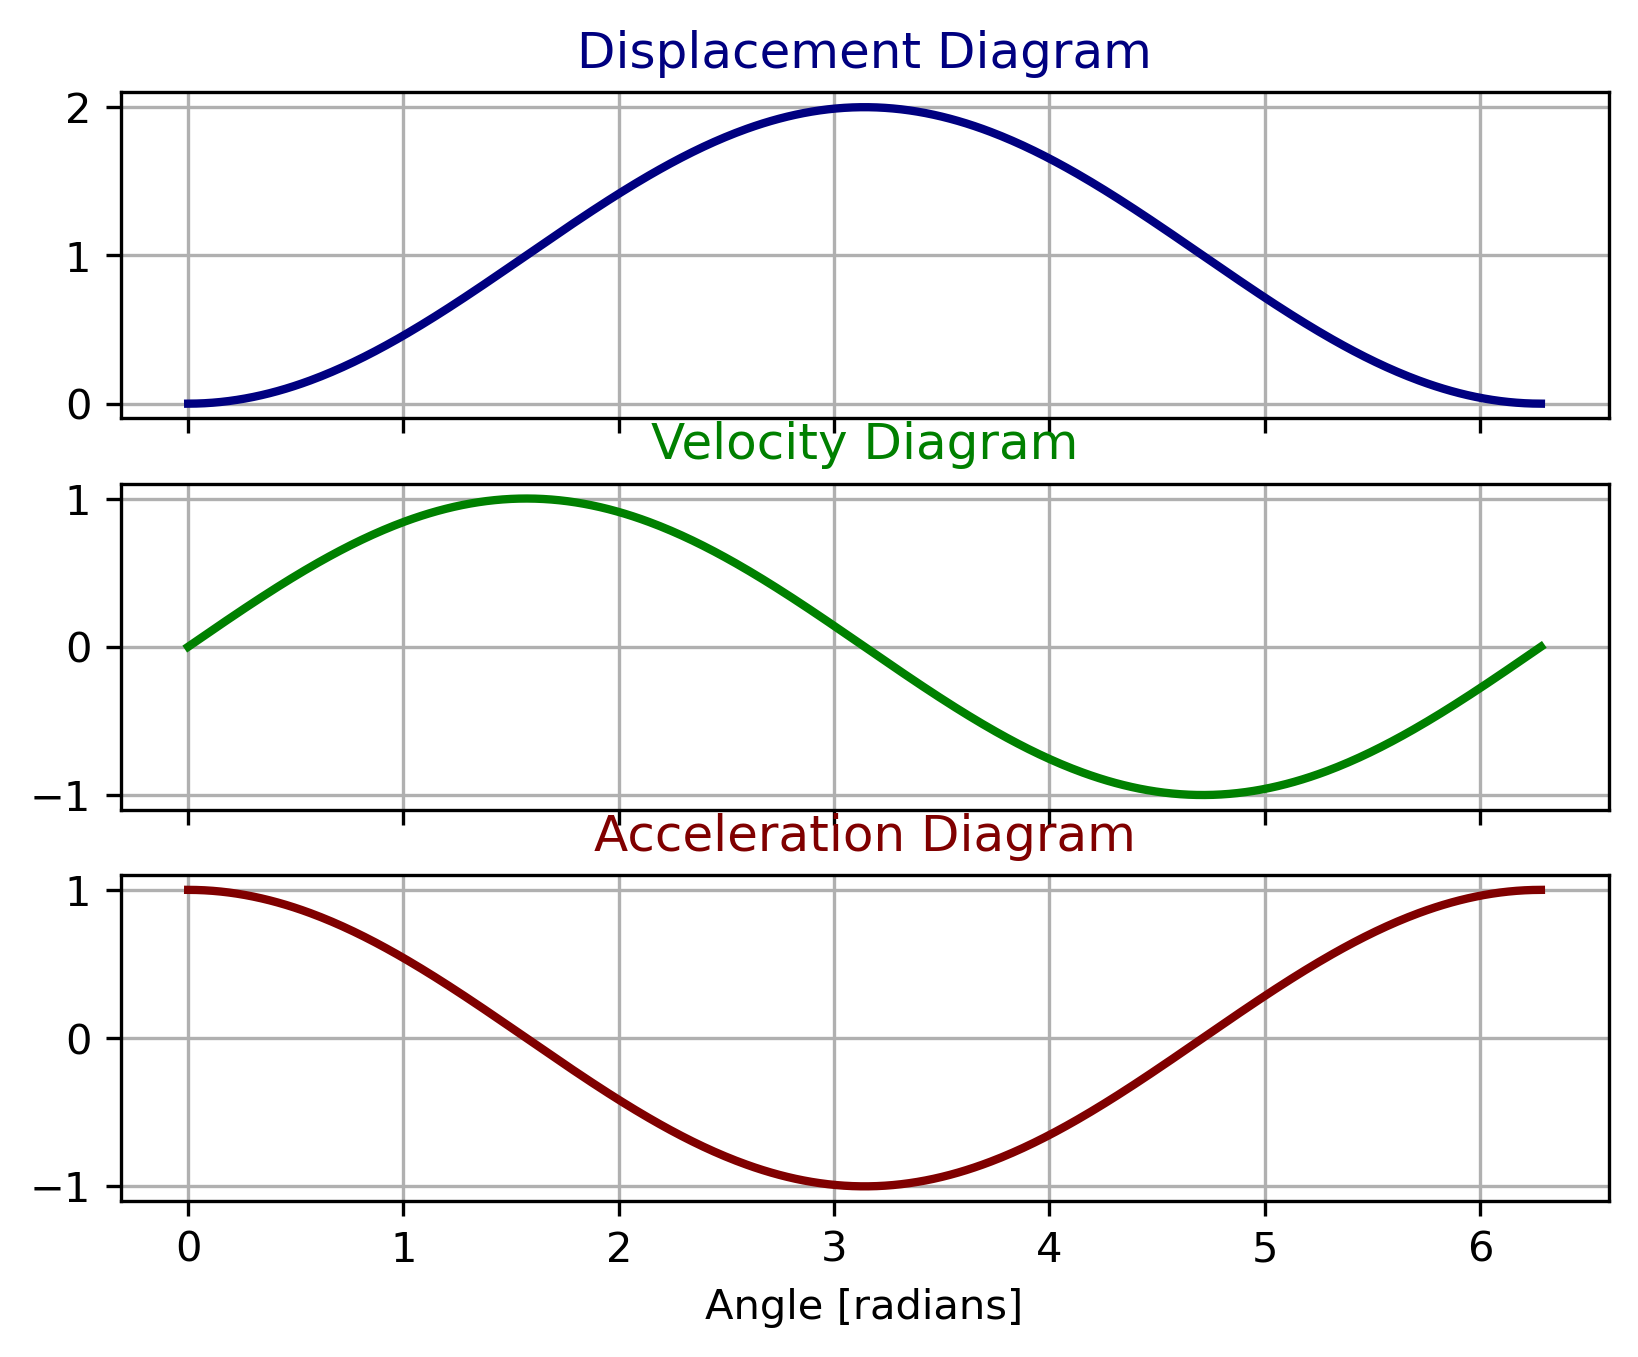

In [12]:
figMD=plt.figure()
Cam.PlotMotionDiagram(figMD)

## Plot the cam profile

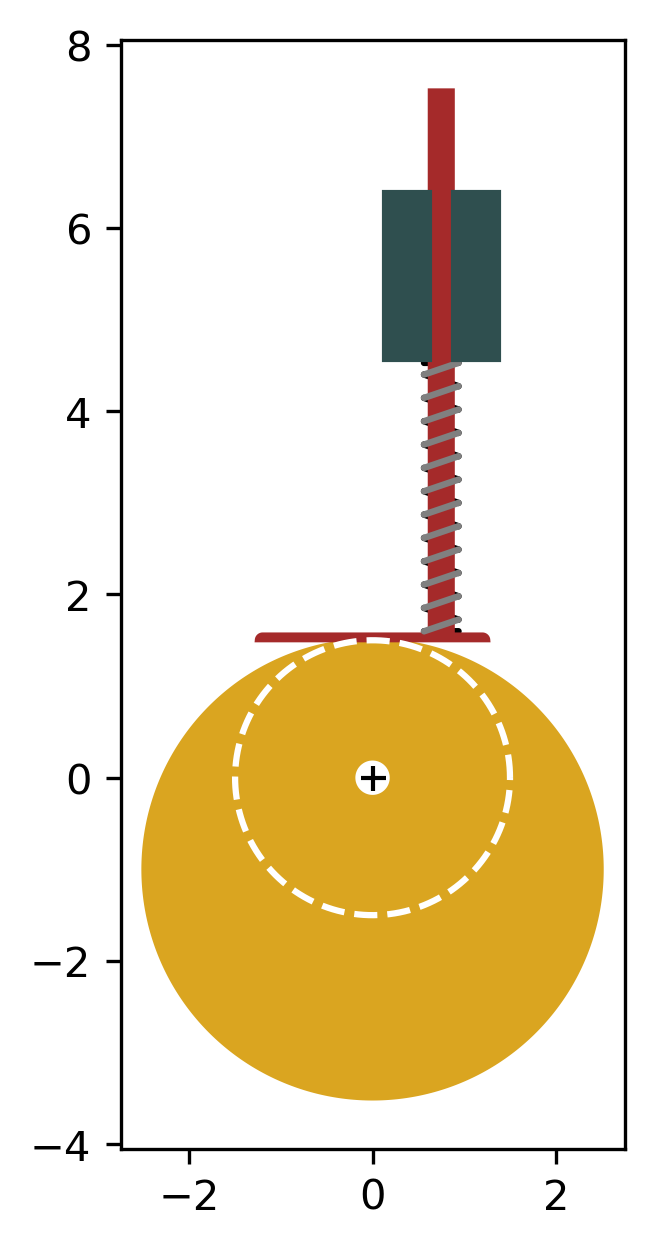

In [14]:
figPCam=plt.figure()
Cam.PlotCamFlatFollower(figPCam)

The profile coordinate data is found in the attributes ```Cam.Xp``` y ```Cam.Yp```:

In [16]:
print(Cam.Xp[0:10]) # Just a few data
print(Cam.Yp[0:10]) # Just a few data

[9.18485099e-17 3.14780525e-02 6.29511143e-02 9.44141955e-02
 1.25862308e-01 1.57290465e-01 1.88693685e-01 2.20066988e-01
 2.51405401e-01 2.82703955e-01]
[1.5        1.49980182 1.49920731 1.49821656 1.49682973 1.49504704
 1.49286877 1.49029527 1.48732694 1.48396427]


## Cam animation

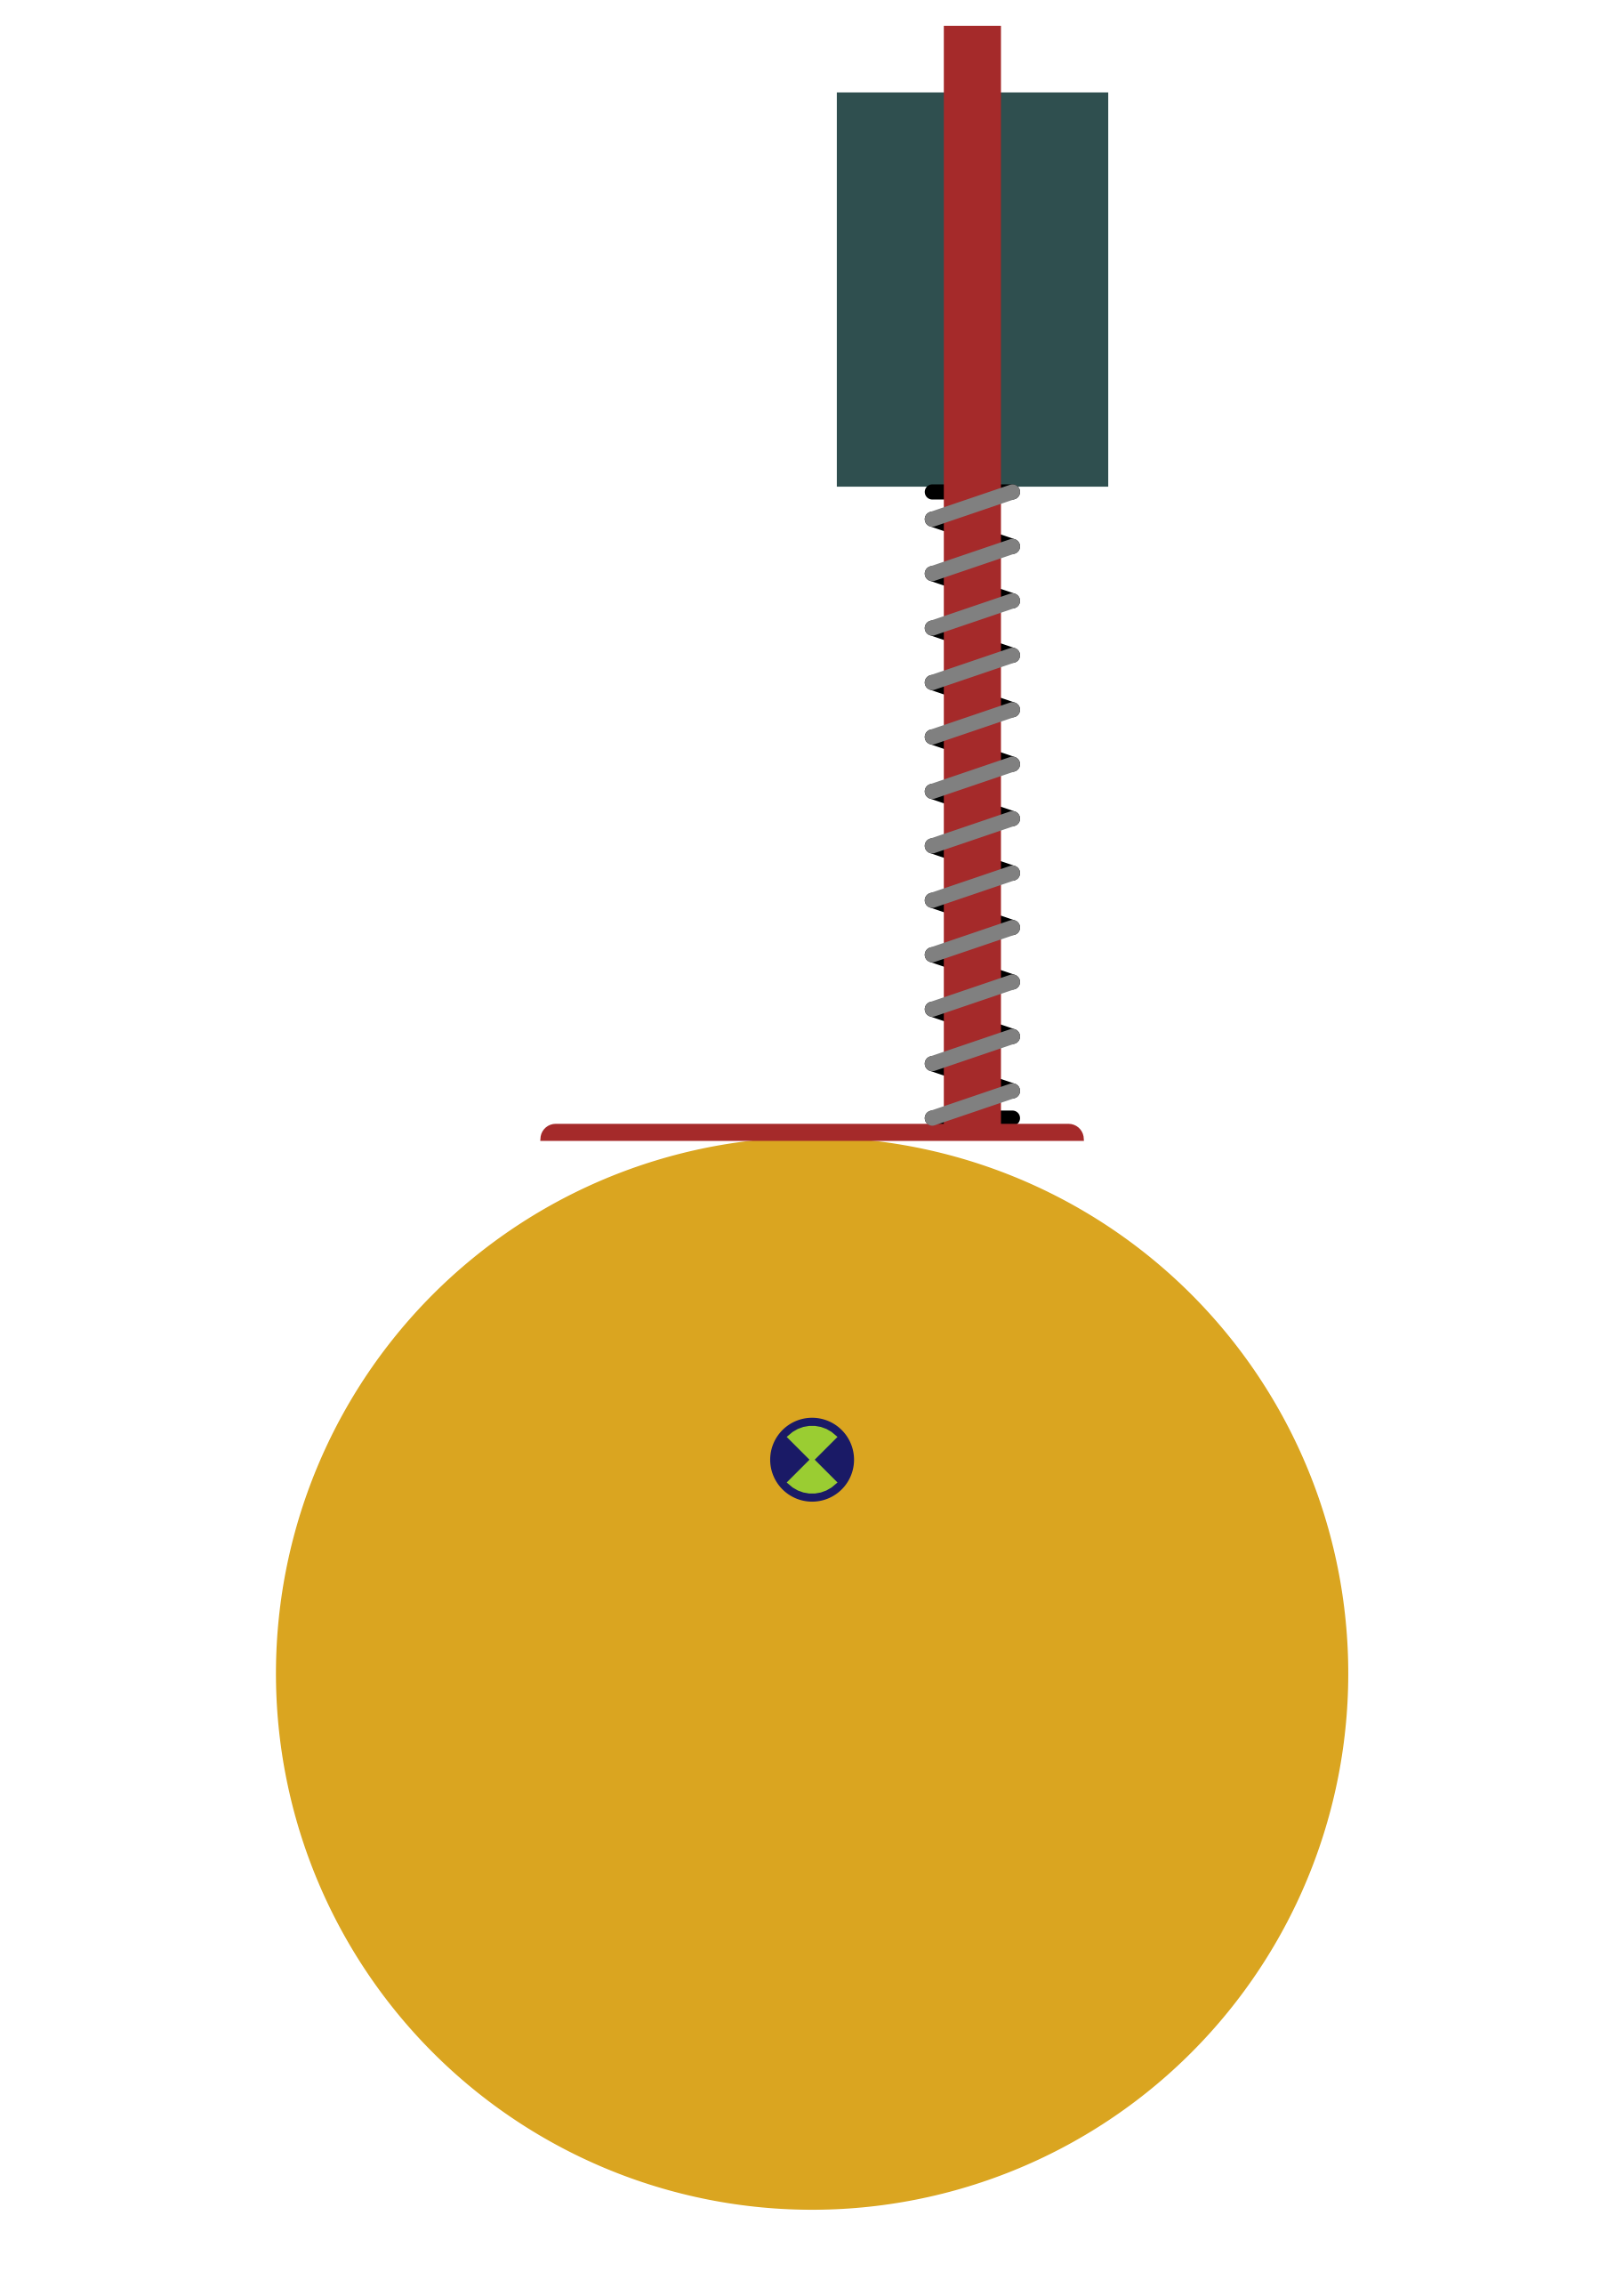

In [18]:
fig, ax=plt.subplots()
ax.set_axis_off()
init_func=Cam.initAnim(ax),
dpi=100
width = 1920/dpi
hight = 1080/dpi
fig.set_size_inches(width,hight)

anim3 = FuncAnimation(fig, Cam, frames=np.arange(1000),
                    interval=100, blit=False)
plt.show()

## Saving the cam animation to a file

In [20]:
writer = animation.writers['ffmpeg'](fps=30)
anim3.save('mp4/Cam602.mp4',writer=writer,dpi=dpi)

## Complete code

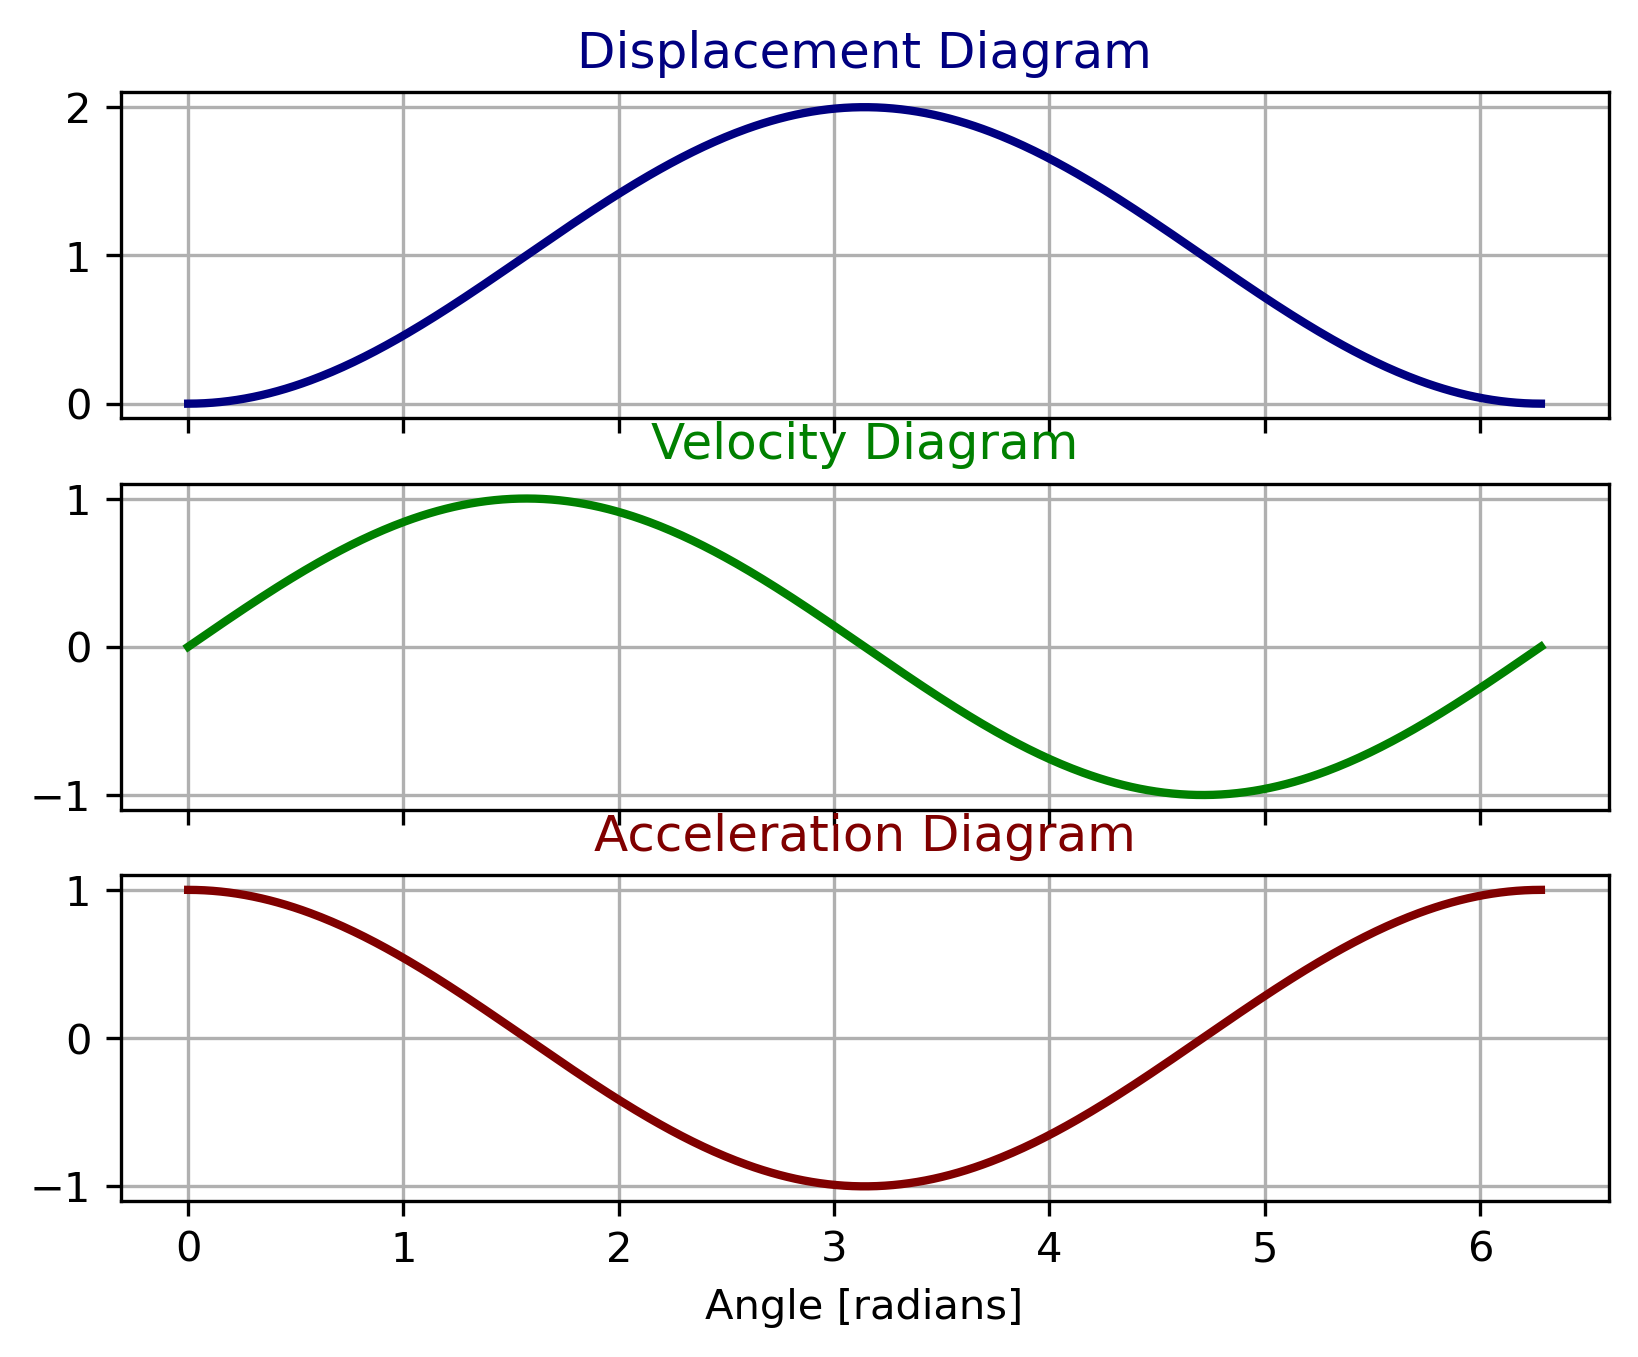

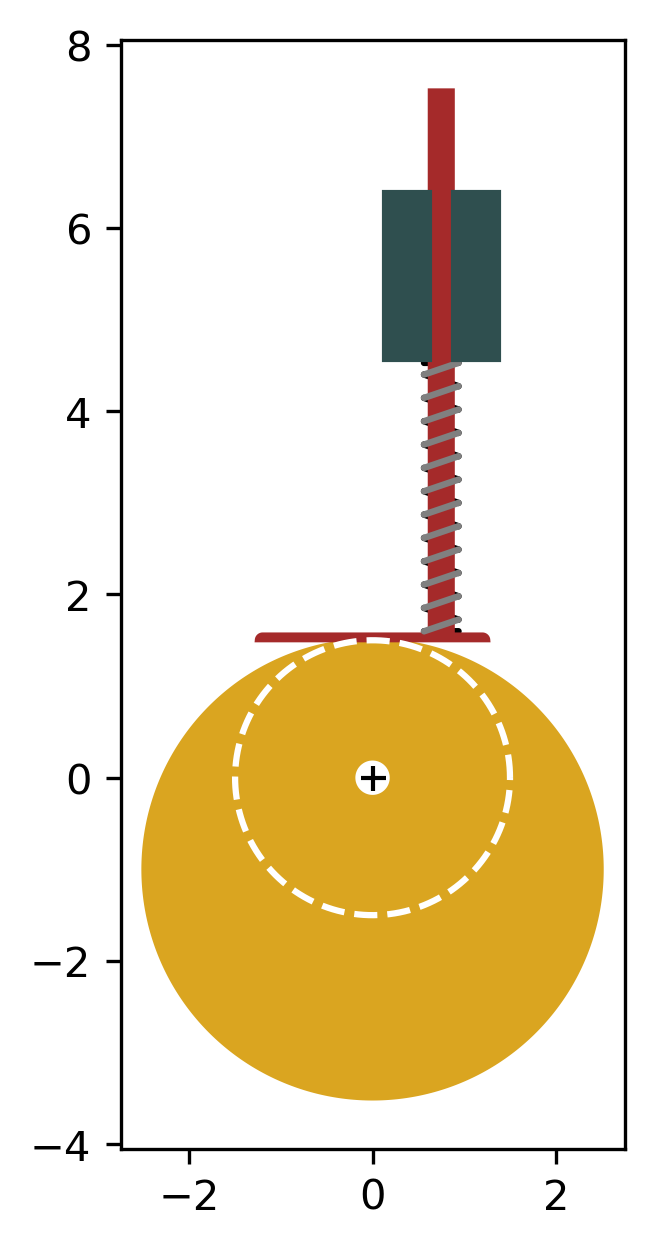

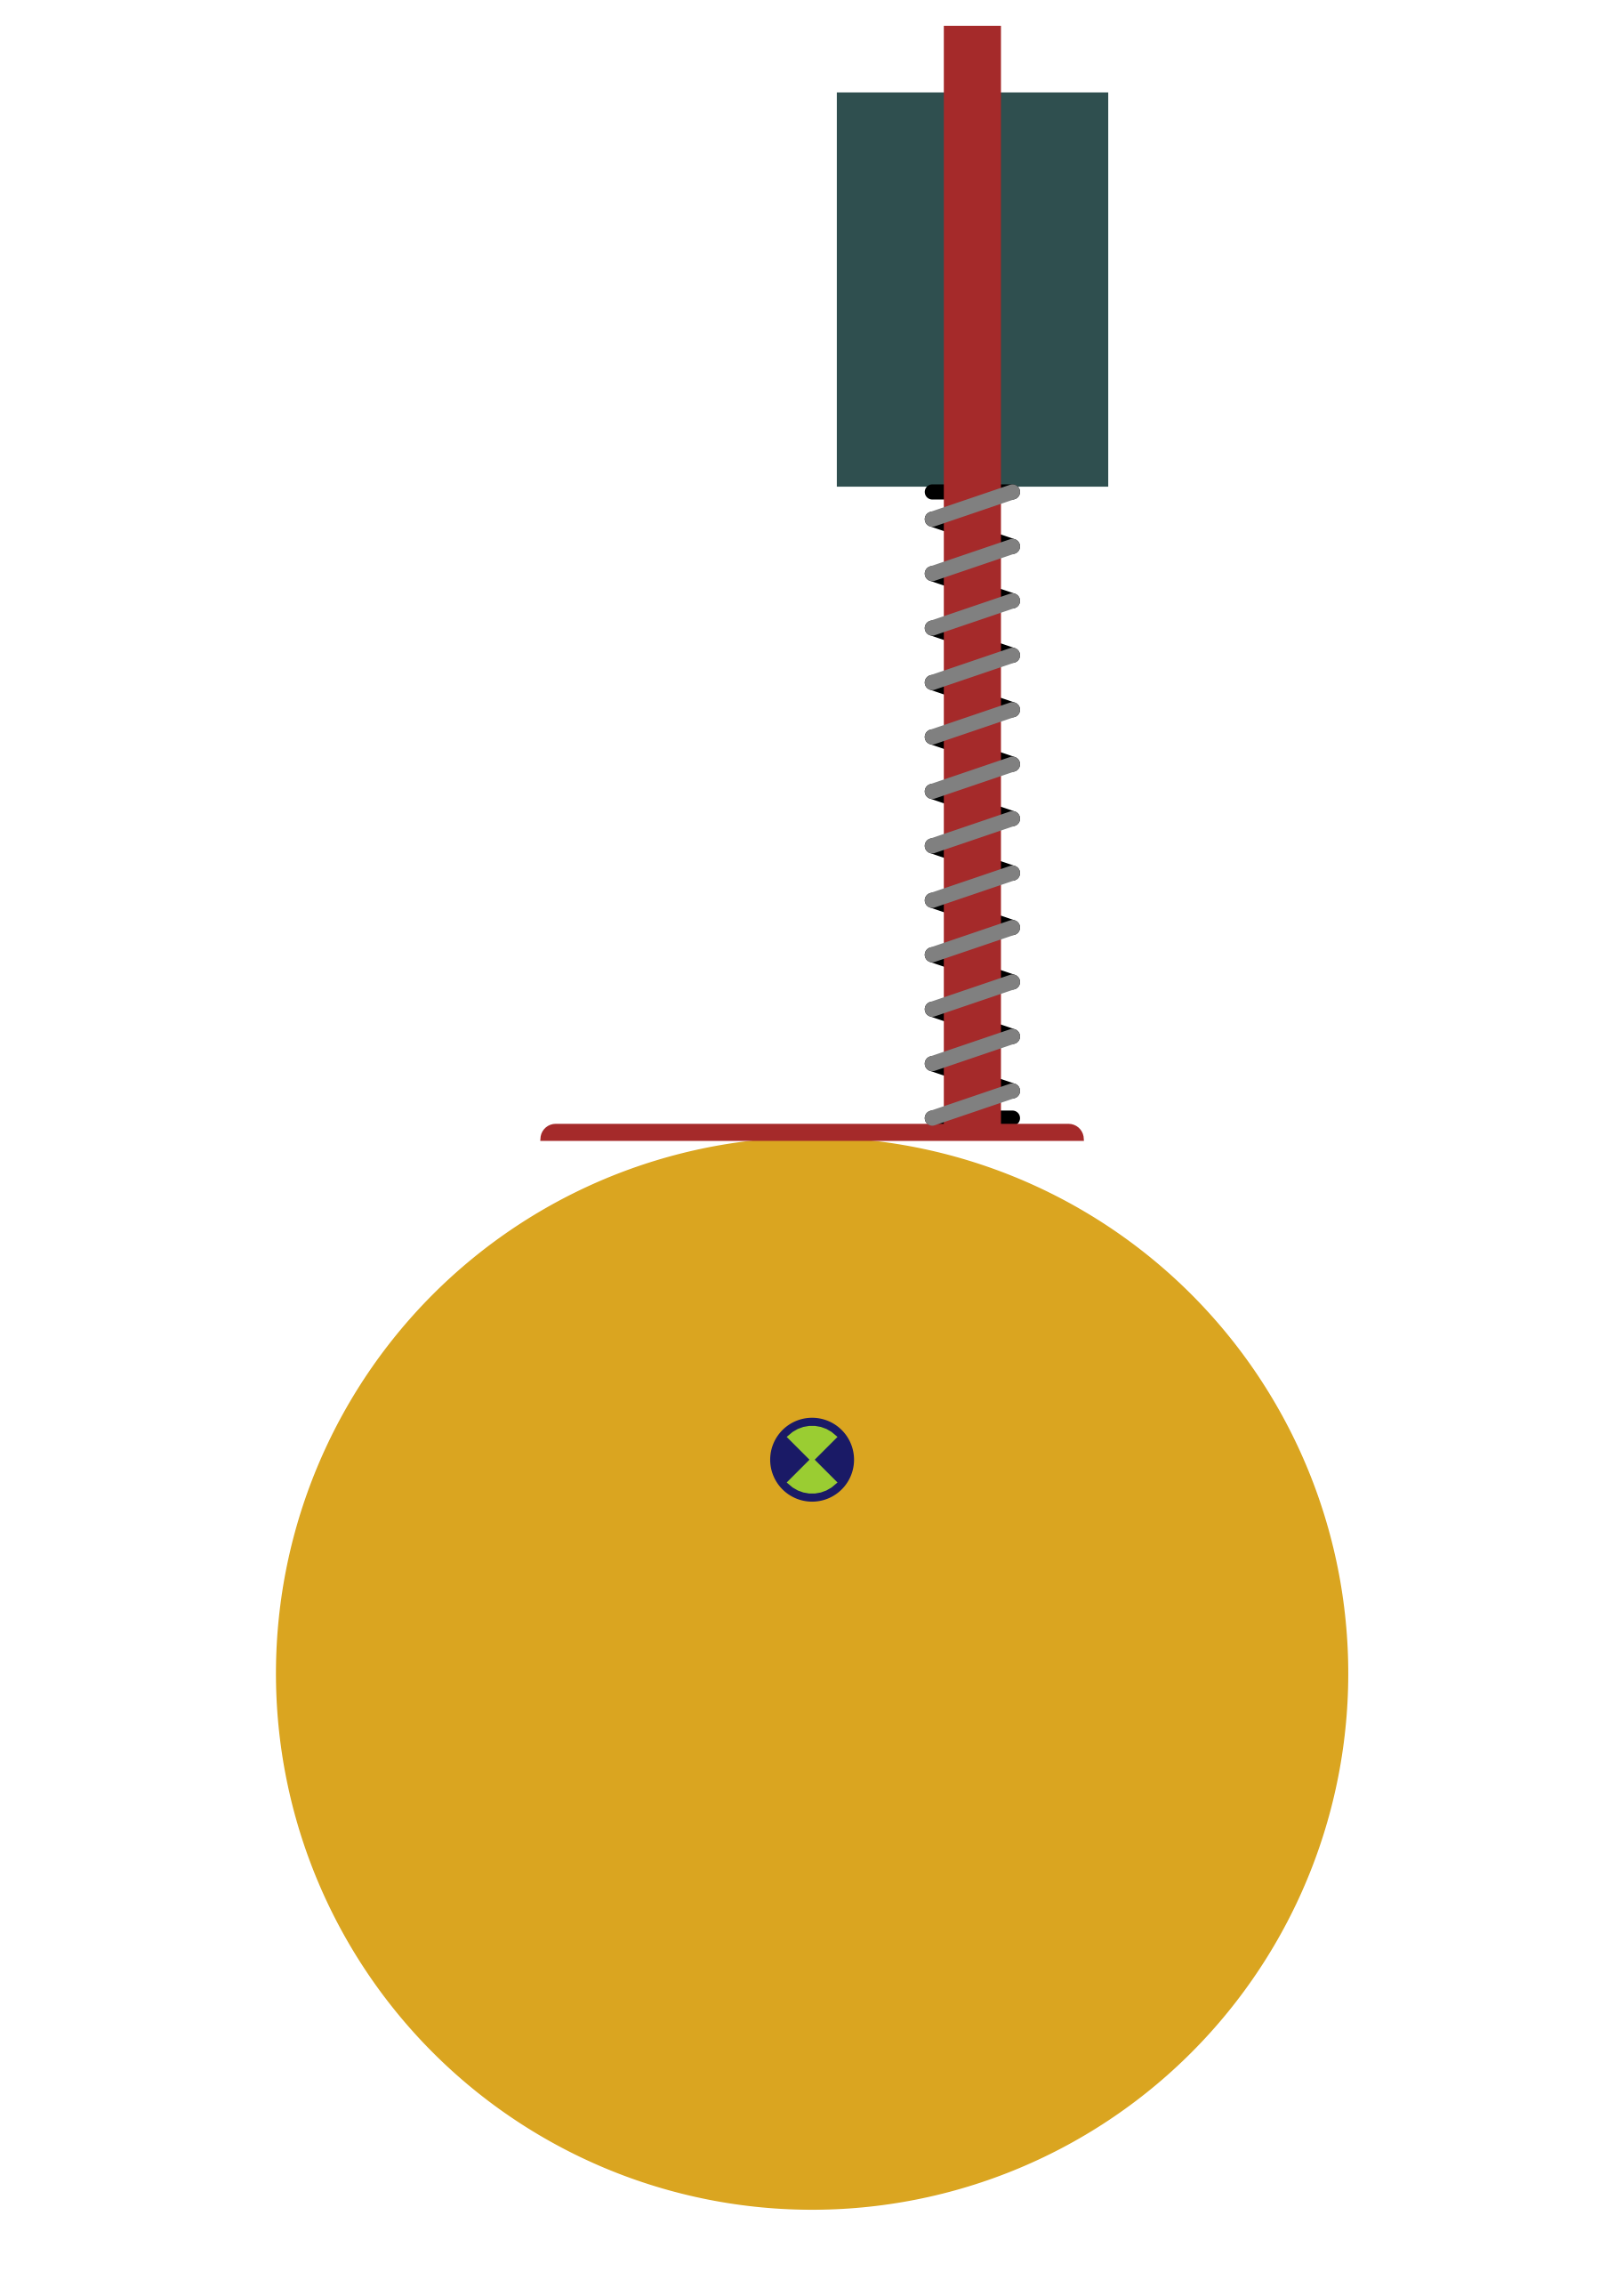

In [22]:
"""
PLATE CAM WITH RECIPROCATING FLAT-FACE FOLLOWER

The reciprocating flat-face follower of a plate
cam is to rise 2 in with simple harmonic motion
in 180◦ of cam rotation and return with simple
harmonic motion in the remaining 180◦. The prime-circle
radius is 1.5 in, and the cam rotates counterclockwise.
Construct the displacement diagram and the cam
profile, offsetting the follower stem by 0.75 in in
the direction that reduces the bending of the follower
during rise.
"""
#%% Libraries
from DiskCamMechanismLibrary import PDCamFlatFaceFollower
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# %% Simple Harmonic Motion
def SimpleHarmonicMotion(th,L):
    y = 0.5*L*(1-np.cos(th))
    yp = 0.5*L*np.sin(th)
    ypp = 0.5*L*np.cos(th)
    return y,yp,ypp
    
# %% problem data
L=2
Rbase=1.5 #prime radius circle
Rbroca=3/16 # drill bit radius (cam center)
eccentricity = 0.75
# Angular position of the follower in radians
FollowerAng = np.pi/2
# angular sweep from zero to 2 pi radians
theta = np.linspace(0,1,500)*2*np.pi
# calculate displacement, velocity, acceleration
y,yp,ypp = SimpleHarmonicMotion(theta,L)

# Group data in dictionary, for other parameters consult the documentation of DiskCamMechanismLibrary
CamData={'theta':theta,
         'y':y,
         'yp':yp,
         'ypp':ypp,
         'Rbase':Rbase,
         'Rhole':Rbroca,
         'epsilon':eccentricity,
         'FollowerAng':FollowerAng,
         'Followerwidth': 4/16,
         'turn_direction':'anti-clockwise',
        }

#%% Calculating the Cam Profile
Cam=PDCamFlatFaceFollower(**CamData)

#%% Motion diagram
figMD=plt.figure()
Cam.PlotMotionDiagram(figMD)

#%% Plot the cam profile
figPCam=plt.figure()
Cam.PlotCamFlatFollower(figPCam)

#%% Cam animation
fig, ax=plt.subplots()
ax.set_axis_off()
init_func=Cam.initAnim(ax),
dpi=100
width = 1920/dpi
hight = 1080/dpi
fig.set_size_inches(width,hight)

anim3 = FuncAnimation(fig, Cam, frames=np.arange(1000),
                    interval=100, blit=False)
plt.show()

#%% Saving the cam animation to a file
writer = animation.writers['ffmpeg'](fps=30)
anim3.save('mp4/Cam602.mp4',writer=writer,dpi=dpi)